<a href="https://colab.research.google.com/github/fclubb/EarthSurfaceProcesses/blob/master/Week3_FluvialIncision/Part1_ChannelProfiles_ANSWERS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Exploring river profiles - Answers

This notebook provides a walkthrough of the exercises from Practical 3 Part 1: Exploring river profiles

__Task:__ Change the values of $k_s$ and $\theta$ in the plots above to see how they affect the relationship between drainage area and gradient. For a reference, a gradient of 0.1 is **very** steep for a river. You will probably transition to channels dominated by debris flows at this gradient (e.g. Stock and Dietrich, 1998). 

_To answer this question, let's make 2 plots: one where we vary $k_s$ and one where we vary $\theta$_

Import some packages I need:

In [4]:
import matplotlib.pyplot as plt
import numpy as np

Make a series of drainage areas:

In [5]:
logA = np.arange(3,6.01,0.25)
A = 10**logA
print(logA,A)

[3.   3.25 3.5  3.75 4.   4.25 4.5  4.75 5.   5.25 5.5  5.75 6.  ] [   1000.            1778.27941004    3162.27766017    5623.4132519
   10000.           17782.79410039   31622.77660168   56234.13251903
  100000.          177827.94100389  316227.76601684  562341.32519035
 1000000.        ]


In this first figure (which is based on code given to you in the practical, I plot 4 different values of $k_s$ but keep $\theta$ fixed at 0.45. You should see that varying $k_s$ changes the Y-intercept of the relationship between slope and drainage area, but doesn't change gradient.

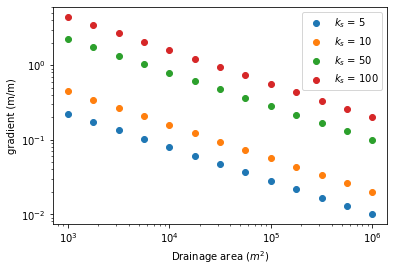

In [9]:
# keep theta fixed at 0.45
theta = 0.45

# let's declare which k_s values we want to use:

k_s_values = [5, 10, 50, 100]

# now we use a for loop to go through the k_s values and plot each one.

for k_s in k_s_values:
  S = k_s*A**(-theta)
  plt.scatter(A,S, label='$k_s$ = {}'.format(k_s))

plt.xlabel("Drainage area ($m^2$)")
plt.ylabel("gradient (m/m)")
plt.yscale('log')
plt.xscale('log')

# add a legend
plt.legend(loc='upper right')

Now let's do the same thing, but we'll keep $k_s$ constant at 10, and we'll change $\theta$ from 0.3 to 0.8. You should see that the gradient of our relationship changes significantly.

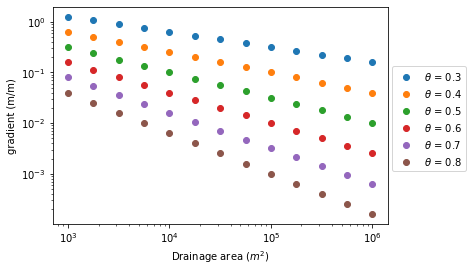

In [17]:
# keep k_s fixed at 10
k_s = 10

# let's declare which theta values we want to use:

theta_values = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

# now we use a for loop to go through the k_s values and plot each one.

for theta in theta_values:
  S = k_s*A**(-theta)
  plt.scatter(A,S, label=r'$\theta$ = {}'.format(theta))

plt.xlabel("Drainage area ($m^2$)")
plt.ylabel("gradient (m/m)")
plt.yscale('log')
plt.xscale('log')

# add a legend. The parameter "bbox_to_anchor" allows you to move the 
# legend out of the plotting area
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 0.75))

### Longitudinal profiles

__Task:__ Change the values of $k_s$, $b$, $x_0$, and $\theta$ in the plots above to see how they affect the channel long profile.

_To answer this question, it's best if you just change the parameters in the code one by one and observe how the affect the long profile. Some things that you might obesrve:_

* _Changing $x_0$ changes the X axis on your plot: the higher the value, the longer your river channel will be._
* _If you change $k_s$ but keep $x_0$ constant, you should find that the elevation values on your plot change. This means that the river is overall steeper for the same distance upstream._
* _Modifying $θ$ changes the concavity of your river: you should observe that if you make $θ$ close to 1, then your river has a very concave shape, whereas if you make it close to 0, then the profile becomes quite flat._
* _It might be difficult to determine what the effect of changing $b$ is on your profile. Remember from the practical that changing $b$ should modify the relationship between length of the channel and drainage area. We can see this in the profiles: if you increase $b$ you get lower elevations at the same drainage area, but your profile also becomes more concave._



In [18]:
def channel_profile(x,ks,theta,b,x0):
    z = []
    term1 = 1-b*theta
    term2 = -b*theta
    for xi in x:
        this_z = ks*( xi*(x0-xi)**term2 - x0*(x0-xi)**term2+ x0**(term1))/(term1)
        z.append(this_z)
    return np.asarray(z)

Now, we can plot. Try manipulating the parameters. Typical ranges of $\theta$ and $k_s$ are listed above. 

* $b$ will range from around 1.8 to a little over 2
* $x_0$ is the length of the channel, so anywhere from a few km (you input this in m) to 50 km. 

Text(0, 0.5, 'elevation (m)')

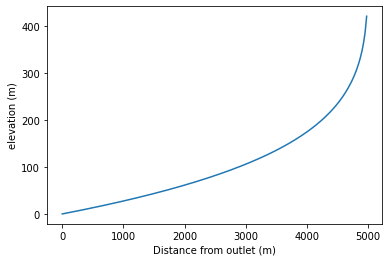

In [33]:
# x0 needs to be in metres!!
x0 = 5000
ks = 25
theta = 0.45
b = 1.8
x = np.arange(0,x0,25)
z = channel_profile(x,ks,theta,b,x0)


plt.plot(x,z)
plt.xlabel("Distance from outlet (m)")
plt.ylabel("elevation (m)")

#print(z)